In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Trainingtable = pd.read_csv('C:/Users/sergiojesus/Desktop/train.csv')

In [3]:
print(Trainingtable.count())
Trainingtable

id               159571
comment_text     159571
toxic            159571
severe_toxic     159571
obscene          159571
threat           159571
insult           159571
identity_hate    159571
dtype: int64


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [11]:
num_rows = Trainingtable.shape[0] #Número de linhas
num_missing = num_rows - Trainingtable.count()
print(num_missing) #Número de NaN por coluna

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [27]:
print(Trainingtable.toxic.value_counts(dropna=False)) # Print da ocorrência de valores numa dada coluna

0    144277
1     15294
Name: toxic, dtype: int64


In [109]:
Trainingtable.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
Trainingtable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
subset = Trainingtable.iloc[[42, 44], [3]]
subset

In [19]:
Trainingtable.groupby('toxic').mean()

,severe_toxic,obscene,threat,insult,identity_hate
toxic,,,,,
0,0.000000,0.003625,0.000201,0.003694,0.000714
1,0.104289,0.518242,0.029358,0.480188,0.085131


   Para qualquer feature, P(toxic|feature = true) = 93%, excepto P(toxic|severe_toxic = true) = 100 %  
   P(toxic)= 9,5844%  


In [78]:
summ = Trainingtable['toxic']
ran = range(Trainingtable.shape[0])
for i in range(2,7):
    summ += Trainingtable.ix[list(ran),[i]]

AttributeError: 'NotImplementedType' object has no attribute 'reindex_like'

In [55]:
ran = range(Trainingtable.shape[0])
print(type(Trainingtable.ix[[ran],[2]]))
summ = Trainingtable['toxic']
type(summ)

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

In [85]:
ran = range(Trainingtable.shape[0])

0         (t, o, x, i, c)
1         (t, o, x, i, c)
2         (t, o, x, i, c)
3         (t, o, x, i, c)
4         (t, o, x, i, c)
5         (t, o, x, i, c)
6         (t, o, x, i, c)
7         (t, o, x, i, c)
8         (t, o, x, i, c)
9         (t, o, x, i, c)
10        (t, o, x, i, c)
11        (t, o, x, i, c)
12        (t, o, x, i, c)
13        (t, o, x, i, c)
14        (t, o, x, i, c)
15        (t, o, x, i, c)
16        (t, o, x, i, c)
17        (t, o, x, i, c)
18        (t, o, x, i, c)
19        (t, o, x, i, c)
20        (t, o, x, i, c)
21        (t, o, x, i, c)
22        (t, o, x, i, c)
23        (t, o, x, i, c)
24        (t, o, x, i, c)
25        (t, o, x, i, c)
26        (t, o, x, i, c)
27        (t, o, x, i, c)
28        (t, o, x, i, c)
29        (t, o, x, i, c)
               ...       
159541    (t, o, x, i, c)
159542    (t, o, x, i, c)
159543    (t, o, x, i, c)
159544    (t, o, x, i, c)
159545    (t, o, x, i, c)
159546    (t, o, x, i, c)
159547    (t, o, x, i, c)
159548    (t

In [89]:
summ = Trainingtable.toxic + Trainingtable.severe_toxic + Trainingtable.obscene + Trainingtable.insult + Trainingtable.threat + Trainingtable.identity_hate

0         0
1         0
2         0
3         0
4         0
5         0
6         4
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
159541    3
159542    0
159543    0
159544    0
159545    0
159546    2
159547    0
159548    0
159549    0
159550    0
159551    0
159552    0
159553    0
159554    3
159555    0
159556    0
159557    0
159558    0
159559    0
159560    0
159561    0
159562    0
159563    0
159564    0
159565    0
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [90]:
Trainingtable['sum']= (summ)

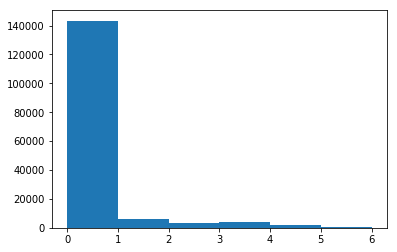

In [249]:
plt.hist(Trainingtable['sum'], bins = 6)
plt.show()

In [104]:
Trainingtable['sum'].describe()

count    159571.000000
mean          0.219952
std           0.748260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: sum, dtype: float64

In [118]:
summ6 = summ[summ == 6]
for i in summ6.index:
    #print(Trainingtable['comment_text'][i])

SyntaxError: unexpected EOF while parsing (<ipython-input-118-69000ec2fc14>, line 3)

In [160]:
comments = Trainingtable['comment_text']
uppercasecount = pd.Series()
for i in range(comments.shape[0]):
    comment = comments[i]
    count = 0
    for c in comment:
        if c.isupper():
            count += 1
    uppercasecount = uppercasecount.append(pd.Series([count], index = [i]))

In [133]:
comments[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [159]:
x=x.append(pd.Series([3],index = [2]))
x

0    4
2    3
2    3
2    3
2    3
dtype: int64

In [168]:
Trainingtable['uppercase_count'] = uppercasecount
Trainingtable

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum,uppercase_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,17
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,8
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,4
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,11
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,2
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,37
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,4
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,7
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0,2


In [170]:
Trainingtable[['sum','uppercase_count']].groupby('sum').mean()

,uppercase_count
sum,
0,14.236993
1,32.999686
2,26.932471
3,36.530767
4,106.406818
5,124.948052
6,149.064516


In [203]:
import csv 
with open('C:/Users/sergiojesus/Desktop/Recursos/Competição de Comments toxicos/full-list-of-bad-words-banned-by-google.csv') as f:
  reader = csv.reader(f)
  swearsBoW = list(reader)
for i in range(1,len(swearsBoW)):
    for word in swearsBoW[i]:
            swearsBoW[0].append(word)
swearsBoW = swearsBoW[0]
newlist= list()
for word in swearsBoW:
    newword = word.strip()
    newword2 = newword.upper()
    newlist.append(newword2)
swearsBoW = newlist

In [305]:
swear_count = pd.Series()
wordlist = [comment.split() for comment in comments]
upperwordlist = list()
commentcount = 0
for sentence in wordlist:
    count = 0
    for word in sentence:
        upperword = word.upper()
        if upperword in swearsBoW:
            count += 1
    swear_count = swear_count.append(pd.Series([count], index = [commentcount]))
    commentcount += 1
    f.value = commentcount

In [302]:
from ipywidgets import FloatProgress
from IPython.display import display
f = FloatProgress(min=0, max=159570)
display(f)

A Jupyter Widget

In [289]:
Trainingtable[['sum','swear_count']].groupby('sum').mean()

,swear_count
sum,
0,0.032781
1,0.860220
2,0.891667
3,2.736042
4,8.229545
5,10.155844
6,5.258065


In [252]:
Trainingtable['swear_count'].describe()

count    159571.000000
mean          0.271641
std           7.437790
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1000.000000
Name: swear_count, dtype: float64

In [274]:
Trainingtable['swear_count'][swear_count == 1000]

87454    1000
Name: swear_count, dtype: int64

In [256]:
Trainingtable['uppercase_count'].describe()

count    159571.000000
mean         17.159628
std          96.528103
min           0.000000
25%           3.000000
50%           7.000000
75%          15.000000
max        4960.000000
Name: uppercase_count, dtype: float64

In [279]:
upper = Trainingtable['uppercase_count']
upper = upper[upper == 4960]

In [284]:
Trainingtable.iloc[11796] 

id                                                  1f31848ca28571da
comment_text       ==U R GAY== \n\nFUCKFUCKFUCKFUCKFUCKFUCKFUCKFU...
toxic                                                              1
severe_toxic                                                       1
obscene                                                            1
threat                                                             0
insult                                                             1
identity_hate                                                      1
sum                                                                5
uppercase_count                                                 4960
swear_count                                                        0
Name: 11796, dtype: object

In [293]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __l

In [304]:
swear_count

177152    0
177153    0
177154    0
177155    0
177156    0
177157    0
177158    2
177159    0
177160    0
177161    0
177162    0
177163    0
177164    0
177165    0
177166    0
177167    1
177168    0
177169    0
177170    0
177171    0
177172    0
177173    0
177174    0
177175    0
177176    0
177177    0
177178    0
177179    0
177180    0
177181    0
         ..
236781    0
236782    0
236783    0
236784    0
236785    0
236786    0
236787    5
236788    0
236789    0
236790    0
236791    0
236792    0
236793    0
236794    0
236795    0
236796    0
236797    0
236798    0
236799    0
236800    0
236801    0
236802    0
236803    0
236804    0
236805    0
236806    0
236807    0
236808    0
236809    0
236810    0
Length: 59659, dtype: int64